In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df=pd.read_csv('adult.data',na_values=' ?',header=None)

df.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [49]:
df.columns = ['age','job_type','person_weight','education_level','education_years',
              'marital_status','job_role','family_role','ethnicity','gender','capital_gain',
              'capital_loss','weekly_hours','country_of_origin','income']


In [50]:
# print(df['age'].min())   # Smallest age
# print(df['age'].max())   # Largest age


print(df['job_type'].unique())


[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']


In [40]:
df.head()

,age,job_type,person_weight,education_level,education_years,marital_status,job_role,family_role,ethnicity,gender,...,capital_loss,weekly_hours,country_of_origin,income,is_senior,net_capital,work_type,is_married,is_native_us,experience_estimate
0,39,6,11.258253,0,13,4,0,1,4,1,...,0,40,38,1,0,2174,0,0,0,26
1,50,5,11.330348,0,13,2,3,0,4,1,...,0,13,38,1,0,0,1,1,0,37
2,38,3,12.281398,2,9,0,5,1,4,1,...,0,40,38,1,0,0,0,0,0,29
3,53,3,12.366157,1,7,2,5,0,2,1,...,0,40,38,1,0,0,0,1,0,46
4,28,3,12.732013,0,13,2,9,5,2,0,...,0,40,4,1,0,0,0,1,0,15


In [8]:
df.shape

(32561, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                32561 non-null  int64 
 1   job_type           30725 non-null  object
 2   person_weight      32561 non-null  int64 
 3   education_level    32561 non-null  object
 4   education_years    32561 non-null  int64 
 5   marital_status     32561 non-null  object
 6   job_role           30718 non-null  object
 7   family_role        32561 non-null  object
 8   ethnicity          32561 non-null  object
 9   gender             32561 non-null  object
 10  capital_gain       32561 non-null  int64 
 11  capital_loss       32561 non-null  int64 
 12  weekly_hours       32561 non-null  int64 
 13  country_of_origin  31978 non-null  object
 14  income             32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.describe()

,age,person_weight,education_years,capital_gain,capital_loss,weekly_hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [11]:
df.isnull().sum()

age                     0
job_type             1836
person_weight           0
education_level         0
education_years         0
marital_status          0
job_role             1843
family_role             0
ethnicity               0
gender                  0
capital_gain            0
capital_loss            0
weekly_hours            0
country_of_origin     583
income                  0
dtype: int64

In [12]:
df.columns


Index(['age', 'job_type', 'person_weight', 'education_level',
       'education_years', 'marital_status', 'job_role', 'family_role',
       'ethnicity', 'gender', 'capital_gain', 'capital_loss', 'weekly_hours',
       'country_of_origin', 'income'],
      dtype='object')

In [13]:
df.columns

Index(['age', 'job_type', 'person_weight', 'education_level',
       'education_years', 'marital_status', 'job_role', 'family_role',
       'ethnicity', 'gender', 'capital_gain', 'capital_loss', 'weekly_hours',
       'country_of_origin', 'income'],
      dtype='object')

In [14]:
df['job_type'].fillna(df['job_type'].mode()[0], inplace=True)
df['job_role'].fillna(df['job_role'].mode()[0], inplace=True)
df['country_of_origin'].fillna(df['country_of_origin'].mode()[0], inplace=True)

df.isnull().sum()



C:\Users\manik\AppData\Local\Temp\ipykernel_26560\1808889699.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['job_role'].fillna(df['job_role'].mode()[0], inplace=True)
C:\Users\manik\AppData\Local\Temp\ipykernel_26560\1808889699.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

age                  0
job_type             0
person_weight        0
education_level      0
education_years      0
marital_status       0
job_role             0
family_role          0
ethnicity            0
gender               0
capital_gain         0
capital_loss         0
weekly_hours         0
country_of_origin    0
income               0
dtype: int64

In [15]:
df['is_senior'] = df['age'] >= 60 
df['net_capital'] = df['capital_gain'] - df['capital_loss']



df['work_type'] = df['weekly_hours'].apply(lambda x: 'Full-time' if x >= 35 else 'Part-time')

df['is_married'] = df['marital_status'].apply(lambda x: 'Married' in x)
df['is_native_us'] = df['country_of_origin'] == 'United-States'

df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)

def categorize_education(num):
    if num <= 8:
        return 'Low'
    elif 9 <= num <= 12:
        return 'Medium'
    else:
        return 'High'

df['education_level'] = df['education_years'].apply(categorize_education)


df['experience_estimate'] = df['age'] - df['education_years']








In [53]:
df.select_dtypes(exclude=['object', 'category']).columns


Index(['age', 'person_weight', 'education_years', 'capital_gain',
       'capital_loss', 'weekly_hours'],
      dtype='object')

In [17]:
df.head()

,age,job_type,person_weight,education_level,education_years,marital_status,job_role,family_role,ethnicity,gender,...,capital_loss,weekly_hours,country_of_origin,income,is_senior,net_capital,work_type,is_married,is_native_us,experience_estimate
0,39,State-gov,77516,High,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,40,United-States,1,False,2174,Full-time,False,False,26
1,50,Self-emp-not-inc,83311,High,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,13,United-States,1,False,0,Part-time,True,False,37
2,38,Private,215646,Medium,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,40,United-States,1,False,0,Full-time,False,False,29
3,53,Private,234721,Low,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,40,United-States,1,False,0,Full-time,True,False,46
4,28,Private,338409,High,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,40,Cuba,1,False,0,Full-time,True,False,15


<Axes: xlabel='income', ylabel='count'>

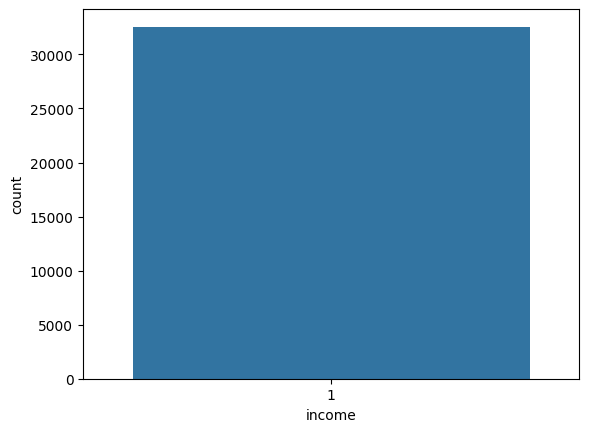

In [18]:
sns.countplot(x='income', data=df)

<Axes: xlabel='age', ylabel='Count'>

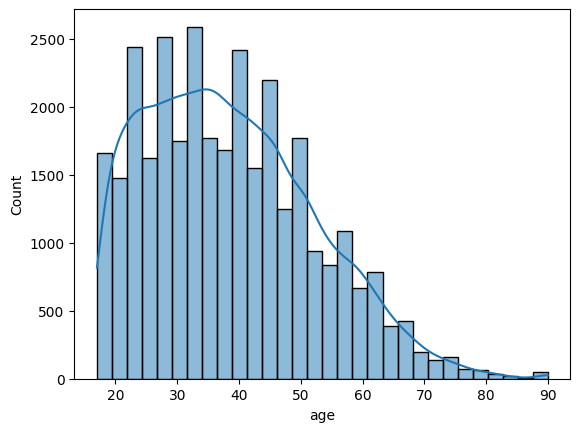

In [19]:
sns.histplot(df['age'], bins=30, kde=True)


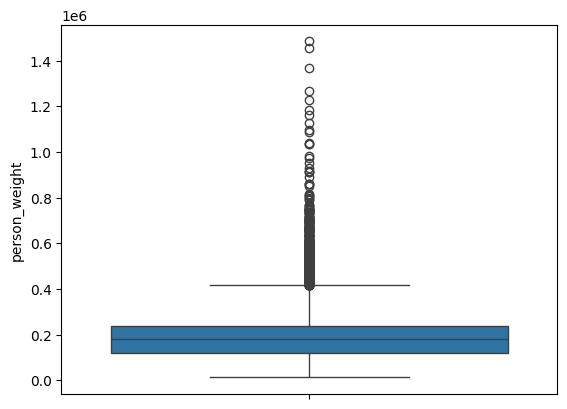

In [20]:
sns.boxplot(df['person_weight'])
plt.show()


In [21]:
df['person_weight'] = np.log1p(df['person_weight'])

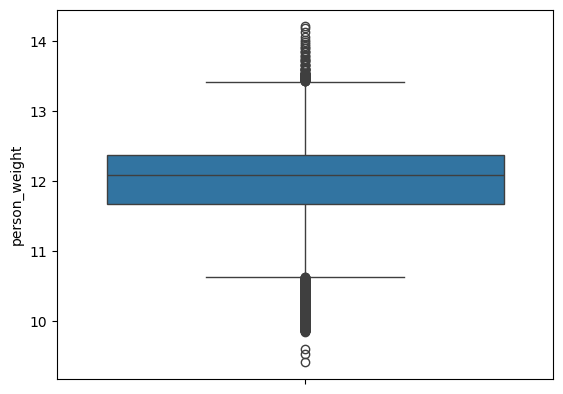

In [22]:
sns.boxplot(df['person_weight'])
plt.show()


In [23]:
df.select_dtypes(include=['object']).columns


Index(['job_type', 'education_level', 'marital_status', 'job_role',
       'family_role', 'ethnicity', 'gender', 'country_of_origin', 'work_type'],
      dtype='object')

In [24]:
df.select_dtypes(exclude=['object']).columns

Index(['age', 'person_weight', 'education_years', 'capital_gain',
       'capital_loss', 'weekly_hours', 'income', 'is_senior', 'net_capital',
       'is_married', 'is_native_us', 'experience_estimate'],
      dtype='object')

In [25]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler
le = LabelEncoder()

df['job_type'] = le.fit_transform(df['job_type'])
df['education_level'] = le.fit_transform(df['education_level'])
df['marital_status'] = le.fit_transform(df['marital_status'])
df['job_role'] = le.fit_transform(df['job_role'])
df['family_role'] = le.fit_transform(df['family_role'])
df['ethnicity'] = le.fit_transform(df['ethnicity'])
df['gender'] = le.fit_transform(df['gender'])
df['country_of_origin'] = le.fit_transform(df['country_of_origin'])
df['work_type'] = le.fit_transform(df['work_type'])
df['is_married'] = le.fit_transform(df['is_married'])
df['is_native_us'] = le.fit_transform(df['is_native_us'])
df['country_of_origin']=le.fit_transform(df['country_of_origin'])
df['is_senior'] = le.fit_transform(df['is_senior'])


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  int64  
 1   job_type             32561 non-null  int32  
 2   person_weight        32561 non-null  float64
 3   education_level      32561 non-null  int32  
 4   education_years      32561 non-null  int64  
 5   marital_status       32561 non-null  int32  
 6   job_role             32561 non-null  int32  
 7   family_role          32561 non-null  int32  
 8   ethnicity            32561 non-null  int32  
 9   gender               32561 non-null  int32  
 10  capital_gain         32561 non-null  int64  
 11  capital_loss         32561 non-null  int64  
 12  weekly_hours         32561 non-null  int64  
 13  country_of_origin    32561 non-null  int64  
 14  income               32561 non-null  int64  
 15  is_senior            32561 non-null 

In [27]:
from sklearn.model_selection import train_test_split
x = df.drop('income', axis=1)
y= df['income']

In [28]:
X_temp, X_check, y_temp, y_check = train_test_split(x, y, test_size=0.1)

X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, train_size=0.8)
print("70% of data for training",X_train.shape)
print("20% of data for testing",X_test.shape)
print("10% of data for validation",X_check.shape)

70% of data for training (23443, 20)
20% of data for testing (5861, 20)
10% of data for validation (3257, 20)


In [29]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_check_scaled = pd.DataFrame(scaler.transform(X_check))

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss,classification_report

print("Accuracy:", model.score(X_test_scaled, y_test))
# print("Log Loss:", log_loss(y_test, model.predict_proba(X_test_scaled)))
print("Confusion Matrix:\n", confusion_matrix(y_test, model.predict(X_test_scaled)))
print("Classification Report:\n", classification_report(y_test, model.predict(X_test_scaled)))
print("Accuracy:", accuracy_score(y_test, model.predict(X_test_scaled)))

Accuracy: 1.0
Confusion Matrix:
 [[5861]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00      5861

    accuracy                           1.00      5861
   macro avg       1.00      1.00      1.00      5861
weighted avg       1.00      1.00      1.00      5861

Accuracy: 1.0


c:\Users\manik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


In [32]:
import numpy as np
predections = model.predict(X_check_scaled)

print("Accuracy:", accuracy_score(y_check, predections)) 

Accuracy: 1.0
